<h1 align='Center' style='color:red'> Heart Disease Prediction Model</h>
<img src="heart_image.jpg"  align='center' alt="Alternative text" />

Dataset Link

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

import Necessary Library

In [ ]:
# importing neccessary model
import warnings # to remove any form of warning by the IDE
warnings.filterwarnings('ignore')
import os
import pandas as pd 
import matplotlib.pyplot as plt # for graphical visual (statistical plot)
import seaborn as sn # another module for ploting data visually 
import numpy as np # module to store value efficiently and perform computation easily on them ....
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

#import neccessary module for training the machine leanring algorithms  
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
# from xgboost import XGBClassifier


importing heart disease dataset

In [ ]:
# listing item (file or folder) in the current directory
os.listdir()

['.ipynb_checkpoints',
 '.jupyter',
 'heart_2020.csv',
 'heart_diesease_model.ipynb',
 'heart_diesease_model.pdf',
 'heart_diesease_model3.ipynb',
 'heart_image.jpg',
 'img.png',
 'img2.png',
 'imm.png',
 'Matplotlib Style Gallery.pdf',
 'result.docx',
 'result.png',
 'set-cardiac-patient-card-heart-disease-diagnosis-treatment-heart-attack_269730-929.avif',
 'SN report.docx',
 'train.csv',
 'UNDER SAMPLE AND OVER SAMPLE TECHNIQUES.ipynb',
 'Untitled.ipynb']

In [ ]:
# importing the heart diseases dataset from the local repository
dataset = pd.read_csv('heart_2020.csv')
# showing first 5 rows of datapset 
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [38]:
# showing randomly any 5 sample within the dataset......
dataset.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
82906,No,32.59,Yes,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Good,7.0,No,No,Yes
30264,No,27.46,Yes,No,No,0.0,0.0,No,Female,65-69,Hispanic,No,No,Good,7.0,No,No,No
298972,No,23.49,No,No,No,0.0,15.0,No,Female,50-54,White,No,Yes,Excellent,8.0,No,No,No
209980,No,33.09,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,No,Good,8.0,No,No,No
146443,No,23.73,No,No,No,0.0,0.0,No,Male,18-24,White,No,Yes,Very good,7.0,No,No,No


In [39]:
# showing last 5 row of the dataset
dataset.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


Exploring the dataset (HEART DISEASE DATASET)

In [40]:
# using the shape attribute of the dataframe to get the number of rows and columns of the dataset 
row , col =  dataset.shape
print(f'Row (Datapoint) :     {row}  \nColumn (Attributes) : {col}')

Row (Datapoint) :     319795  
Column (Attributes) : 18


showing the unique columns in the dataset

In [41]:
# showing all the attributes/columns/features present in the dataset.......
dataset.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Visualizaing Datatype, Numbers of Null in every Attribute

In [42]:
# showing the  essential information about the dataset using the info() method .... information reveal include  
# 1. columns
# 2. Non-Null : Number of Values 
# 3. Dtype : Data type 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

showing statistical data about the numberical attributes or columns

In [43]:
# this line of code reveal statistical information about the columns having numerical value 
# information such as the mean, standard diviation, the number of value, max value etc...
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Viewing Unique Value for each attribute 

In [44]:
# a custom function is created to reveal unique value present in a pass dataset by specifying the column index
# function creation
def get_uniques_val(df , col_index): 
    for col in col_index: 
        print(f'Uniques Entries (Value) in {df.columns[col]}')
        val = df[df.columns[col]].unique()
        print(val)
        print('_____________________________________________________')

# checking the numbers of unique value in the attribute

# function calling 
get_uniques_val(dataset, [0,2,3,4,7,8,9,10,11,12,13,15,16,17])

Uniques Entries (Value) in HeartDisease
['No' 'Yes']
_____________________________________________________
Uniques Entries (Value) in Smoking
['Yes' 'No']
_____________________________________________________
Uniques Entries (Value) in AlcoholDrinking
['No' 'Yes']
_____________________________________________________
Uniques Entries (Value) in Stroke
['No' 'Yes']
_____________________________________________________
Uniques Entries (Value) in DiffWalking
['No' 'Yes']
_____________________________________________________
Uniques Entries (Value) in Sex
['Female' 'Male']
_____________________________________________________
Uniques Entries (Value) in AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
_____________________________________________________
Uniques Entries (Value) in Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
_____________________________________________________


 Visualizaing the prediction (Yes = 1, No = 0) class using BAR CHART 

 the bar chart below show that that dataset is unbalance... hence, data <br> balancing techniques is essential to avoid biase prediction 

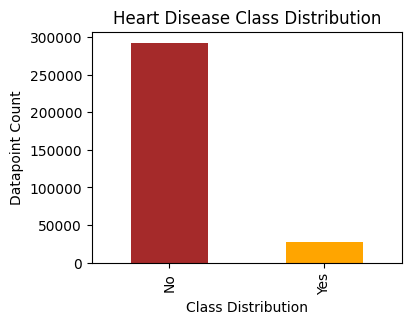

In [45]:
# loading dataset content to dt ... basically just chaining variable name to dt 
dt = dataset

# ploting the HeartDisease Attribut unique value count using bar chat
dt.HeartDisease.value_counts().plot(kind='bar', title= f'Heart Disease Class Distribution', color=['brown', 'orange'], figsize=(4,3))
plt.xlabel('Class Distribution')
plt.ylabel('Datapoint Count')
plt.show()

# the chart shows that the dataset is higly bais... 
# No (Patient not having Heart Dsieases) is about 300,000
# while patient with heart diseases is about 50,000

In [46]:
# building a custom method to return uniques value of a column based on the threshold value 
# the threshold denote the condition of returning only columns with uniques value of size 2 (binary divided data)
attribute = 'HEART'
%matplotlib inline

def get_attribute_unique_threshold(df, treshold=2):
    columns = []
    size = []
    data = []
    for col in df.columns: 
        if df[col].unique().size <= treshold:
            size.append(df[col].unique().size)
            data.append(df[col].unique())
            columns.append(col)
            
    return columns, size, data

Exploring Attribute that as uniques value below 20

In [47]:
# method is called with threashold of 20
attribute , size, data = get_attribute_unique_threshold(dt, 20)
data = {'Attribute': attribute, 'Unique Value': data , "Count": size}
att_df = pd.DataFrame(data)
att_df

,Attribute,Unique Value,Count
0,HeartDisease,"[No, Yes]",2
1,Smoking,"[Yes, No]",2
2,AlcoholDrinking,"[No, Yes]",2
3,Stroke,"[No, Yes]",2
4,DiffWalking,"[No, Yes]",2
5,Sex,"[Female, Male]",2
6,AgeCategory,"[55-59, 80 or older, 65-69, 75-79, 40-44, 70-7...",13
7,Race,"[White, Black, Asian, American Indian/Alaskan ...",6
8,Diabetic,"[Yes, No, No, borderline diabetes, Yes (during...",4
9,PhysicalActivity,"[Yes, No]",2


Exploring Attribute that as uniques value below or equal 2

In [48]:
# method is called with threashold of 2
attribute , size, data = get_attribute_unique_threshold(dt, 2)
data = {'Attribute': attribute, 'Unique Value': data , "Count": size}
binary_attribute = pd.DataFrame(data)
binary_attribute

,Attribute,Unique Value,Count
0,HeartDisease,"[No, Yes]",2
1,Smoking,"[Yes, No]",2
2,AlcoholDrinking,"[No, Yes]",2
3,Stroke,"[No, Yes]",2
4,DiffWalking,"[No, Yes]",2
5,Sex,"[Female, Male]",2
6,PhysicalActivity,"[Yes, No]",2
7,Asthma,"[Yes, No]",2
8,KidneyDisease,"[No, Yes]",2
9,SkinCancer,"[Yes, No]",2


 distribution count of each attribute against the Heart Diesease

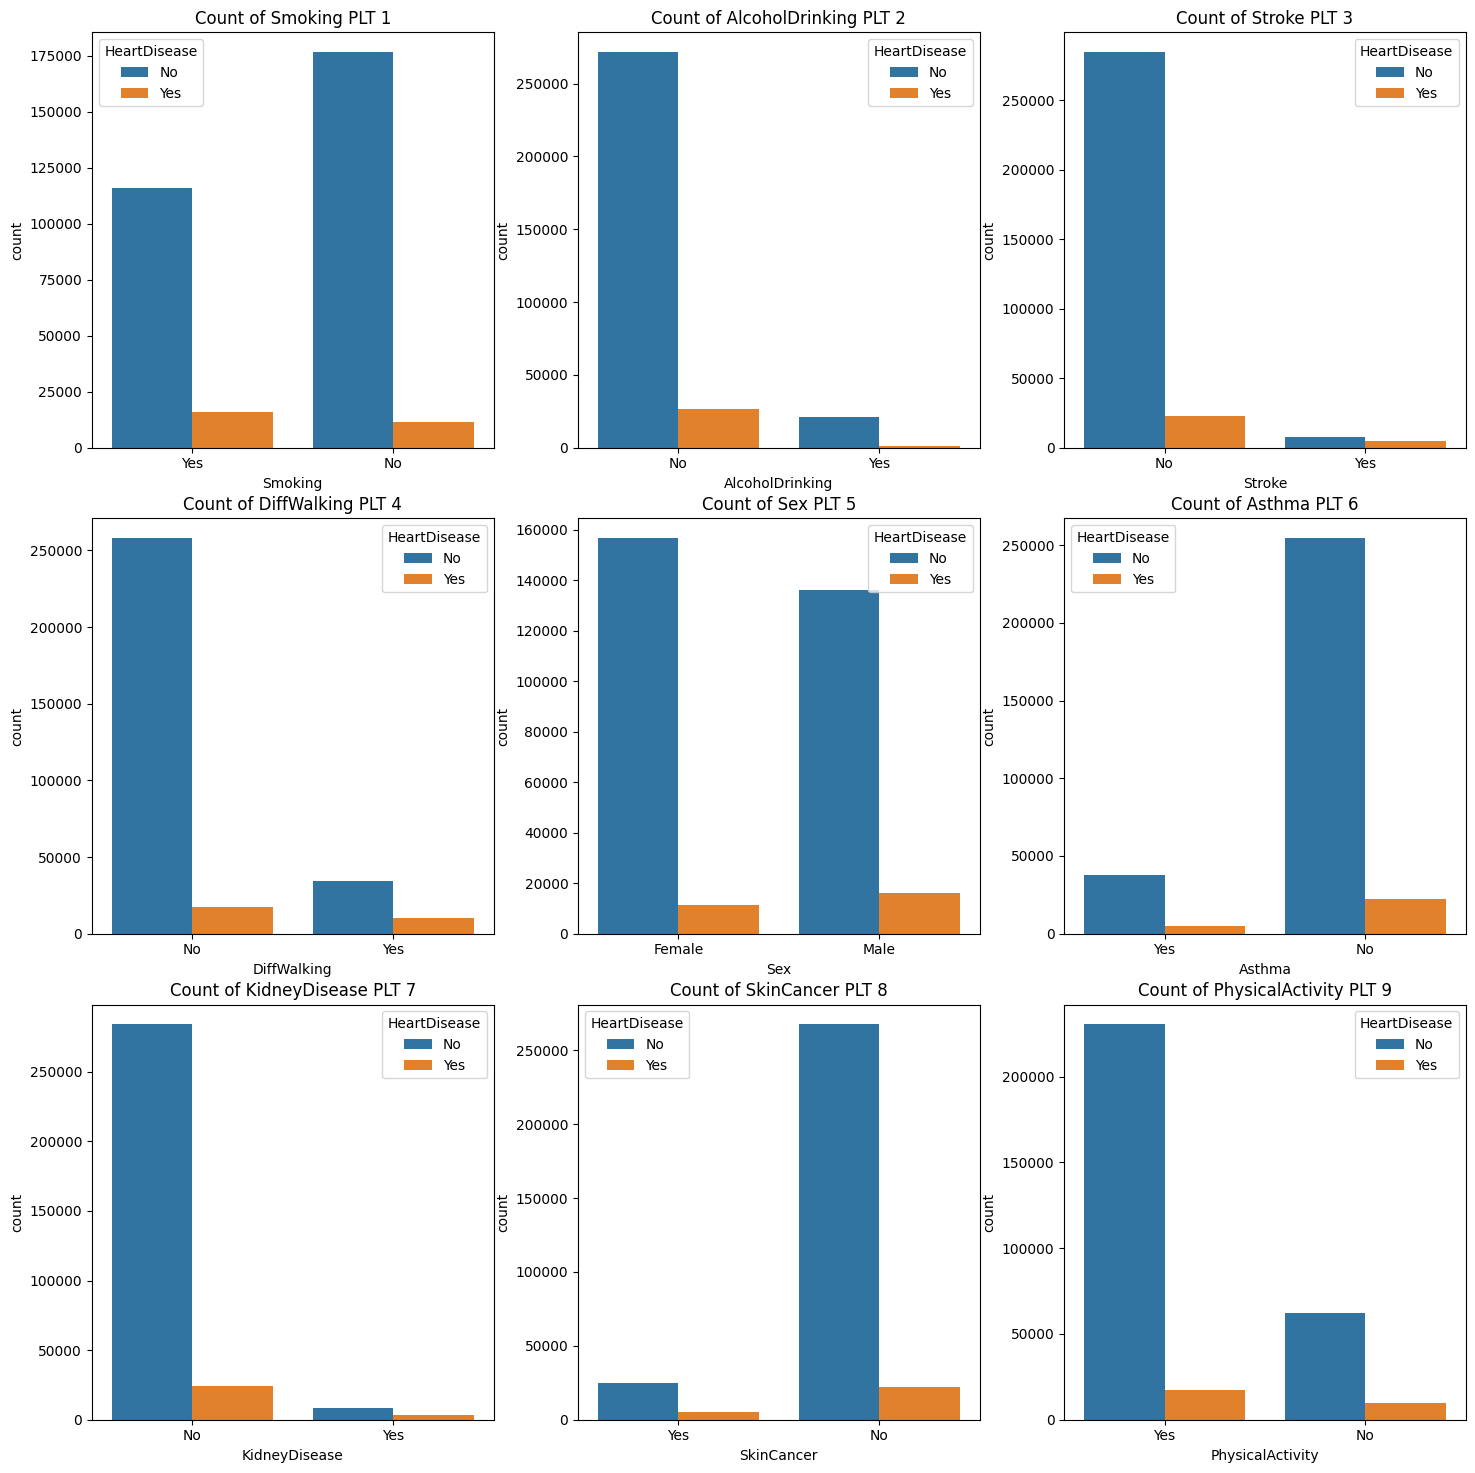

In [49]:
fig , axis = plt.subplots(3,3 , figsize=(15, 15))
fig.tight_layout(pad=3.0)
sn.countplot(x='Smoking' ,           hue='HeartDisease', data=dataset , ax=axis[0,0])
sn.countplot(x='AlcoholDrinking' , hue='HeartDisease', data=dataset , ax=axis[0,1])
sn.countplot(x='Stroke' ,          hue='HeartDisease', data=dataset , ax=axis[0,2])
sn.countplot(x='DiffWalking' ,     hue='HeartDisease', data=dataset , ax=axis[1,0])
sn.countplot(x='Sex' ,             hue='HeartDisease', data=dataset , ax=axis[1,1])
sn.countplot(x='Asthma' ,          hue='HeartDisease', data=dataset , ax=axis[1,2])
sn.countplot(x='KidneyDisease' ,   hue='HeartDisease', data=dataset , ax=axis[2,0])
sn.countplot(x='SkinCancer' ,      hue='HeartDisease', data=dataset , ax=axis[2,1])
sn.countplot(x='PhysicalActivity' ,        hue='HeartDisease', data=dataset , ax=axis[2,2])

axis[0,0].set_title("Count of Smoking PLT 1")
axis[0,1].set_title("Count of AlcoholDrinking PLT 2")
axis[0,2].set_title("Count of Stroke PLT 3")
axis[1,0].set_title("Count of DiffWalking PLT 4")
axis[1,1].set_title("Count of Sex PLT 5")
axis[1,2].set_title("Count of Asthma PLT 6")
axis[2,0].set_title("Count of KidneyDisease PLT 7")
axis[2,1].set_title("Count of SkinCancer PLT 8")
axis[2,2].set_title("Count of PhysicalActivity PLT 9")

plt.show()

Observation Based on the PLOT above <br>
PLT 1 - Based on the plot its reveal that smokers have higher chance of having Heart Disease<br>
PLT 2 - those that drink alcohol as lower chance of having Heart Disease <br>
PLT 3 - Based on the plot those with stroke has lower chance of having heart disease <br>
PLT 4 - If you have difficulty in walking you have a lower chance of have heart disease <br>
PLT 5 - Their is an higher chance of male have heart diesease than female <br>
PLT 6 - Those with Asthma as lesser chance of having heart diesease <br>
PLT 7 - those without kiedney stone has higher chance of having heart dieases <br>
PLT 8 - Patient with skin cancer have highter chance of not having heart disease <br>
PLT 9 - Participation in Physical Activity leads to Heart Diseases <br>

Visualizaing percentage correlation of Binary Value Attributes to the prediction variable (Heart Dieases)

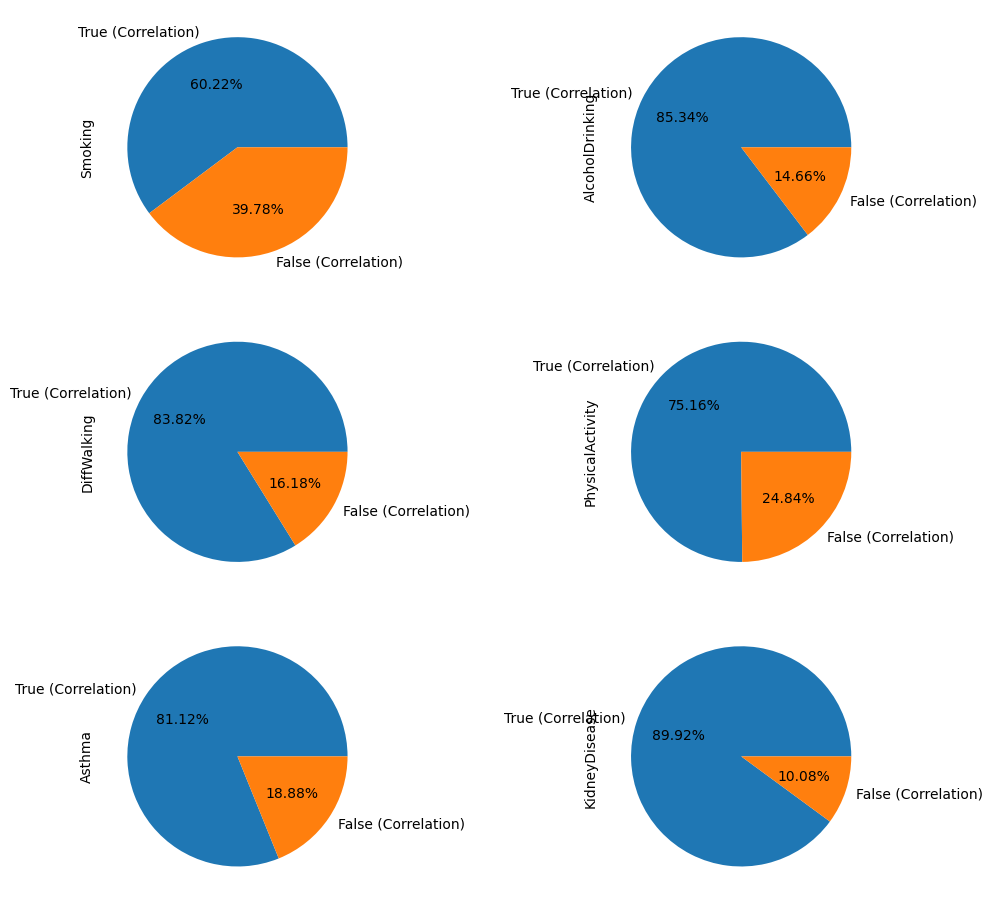

In [50]:
s1 =  pd.Series(dt['HeartDisease'].values == dt['Smoking'].values)
s2 =  pd.Series(dt['HeartDisease'].values == dt['AlcoholDrinking'].values)
s3 =  pd.Series(dt['HeartDisease'].values == dt['DiffWalking'].values)
s4 =  pd.Series(dt['HeartDisease'].values == dt['PhysicalActivity'].values)
s5 =  pd.Series(dt['HeartDisease'].values == dt['Asthma'].values)
s6 =  pd.Series(dt['HeartDisease'].values == dt['KidneyDisease'].values)
s7 =  pd.Series(dt['HeartDisease'].values == dt['SkinCancer'].values)

data_distribution = pd.DataFrame({'Smoking':s1, 'AlcoholDrinking':s2, 'DiffWalking':s3, 'PhysicalActivity':s4, 'Asthma':s5 , 'KidneyDisease':s6, 'SkinCancer':s7})
data_distribution
for index in range(6): 
    plt.subplot(4,2, (index+1))
    plt.tight_layout(pad=0.4)
    colors = (np.random.random(), np.random.random(), np.random.random())
    data_distribution[data_distribution.columns[index]].value_counts().plot(kind='pie',  \
                          autopct='%.2f%%', labels=['True (Correlation)', 'False (Correlation)'] , figsize=(10, 12))
    

    # the correlation of heart diesease is measured against the following attribute with binary categorical value
    # 1. smoking
    # 2. AlcoholDrinking
    # 3. DiffWalking
    # 4. PhysicalActivity
    # 5. Asthma
    # 6. KidneyDisease
    # 7. SkinCancer

    # kidney dieases as highest correlation of 89.92%

Observation Made on Data Correlation 
1. A Patient that smoke has 60.22% chance of having Heart Dieases <br>
2. An Alcholic patient has high chance (85.34) of having heart Disease <br>
3. for diff walking thier is 83.82% of having heart dieseas <br>
4. there is high chance of having if u Asthmatic than doing pyhisical Activity <br>
5. A patient with kidney disease (89.92) have highter chance than Asthmatic patient (81.12) in having heart Diesease <br>

Correlation observation using confution matrix of Numerical feature by correlating with Heart Dieases 

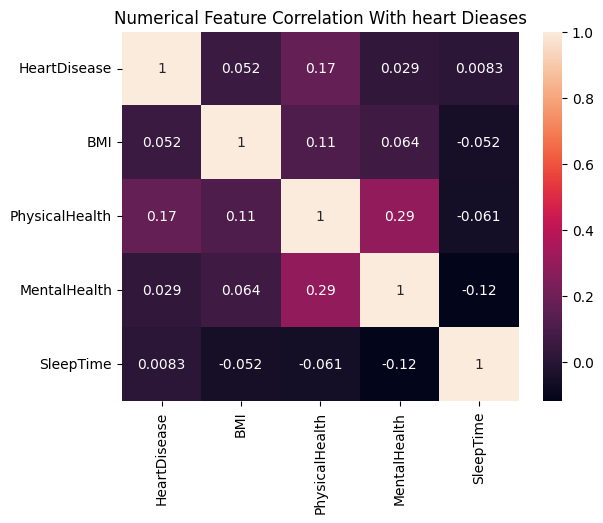

In [51]:
# sn.heatmap(dataset.corr() , annot=True)
tem_data = dataset
tem_data.HeartDisease = tem_data.HeartDisease.astype('category').cat.codes
sn.heatmap(tem_data.corr() , annot=True)
plt.title('Numerical Feature Correlation With heart Dieases')
plt.show()

Observation 
1. Pyshical health of a patient has the highest correlation thus, higher chance of having Heart Dieases.. 
3. SleepTime of a patient has very low chance of have heart diesase. 

Cleaning and Preprocessing 

<h3 style='color:brown; align:center' align='center'> Coverting object DATA type attribute to categorical for easy encoding to numerical representation </h3>

In [52]:
# getting column with 20 value count threshold and then checking thier infomations
# # viewing essentail information about the dataset using the info() method .... information reveal include  
# 1. columns
# 2. Non-Null : Number of Values 
# 3. Dtype : Data type 
col , uni_count , val = get_attribute_unique_threshold(dt, 20)
dt[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  int8  
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   Stroke            319795 non-null  object
 4   DiffWalking       319795 non-null  object
 5   Sex               319795 non-null  object
 6   AgeCategory       319795 non-null  object
 7   Race              319795 non-null  object
 8   Diabetic          319795 non-null  object
 9   PhysicalActivity  319795 non-null  object
 10  GenHealth         319795 non-null  object
 11  Asthma            319795 non-null  object
 12  KidneyDisease     319795 non-null  object
 13  SkinCancer        319795 non-null  object
dtypes: int8(1), object(13)
memory usage: 32.0+ MB


Show the Categorical Data type conversion outcome

In [53]:
# converting the object type columns into categorical type 
# this makes it easy to categorically map those columns value to unique numerical value
dt[col] = dt[col].astype('category')
dt[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      319795 non-null  category
 1   Smoking           319795 non-null  category
 2   AlcoholDrinking   319795 non-null  category
 3   Stroke            319795 non-null  category
 4   DiffWalking       319795 non-null  category
 5   Sex               319795 non-null  category
 6   AgeCategory       319795 non-null  category
 7   Race              319795 non-null  category
 8   Diabetic          319795 non-null  category
 9   PhysicalActivity  319795 non-null  category
 10  GenHealth         319795 non-null  category
 11  Asthma            319795 non-null  category
 12  KidneyDisease     319795 non-null  category
 13  SkinCancer        319795 non-null  category
dtypes: category(14)
memory usage: 4.3 MB


<h3 style='color:green; align:center' align='center'>COVERT CATEGORY TYPE INTO RESPECTIVE NUMERIC CODE </h3>

In [54]:
# encoding the neccessary columns into numerical representation 
for c in col:
    dt[c] = dt[c].cat.codes
    
dt.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0


information about the encoded features into number type (int8)

In [55]:
# showing the attribute data type after convertion to integers (numeric representation)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int8   
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int8   
 3   AlcoholDrinking   319795 non-null  int8   
 4   Stroke            319795 non-null  int8   
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int8   
 8   Sex               319795 non-null  int8   
 9   AgeCategory       319795 non-null  int8   
 10  Race              319795 non-null  int8   
 11  Diabetic          319795 non-null  int8   
 12  PhysicalActivity  319795 non-null  int8   
 13  GenHealth         319795 non-null  int8   
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int8   
 16  KidneyDisease     31

<h3 style='color:green; align:center' align='center'> FEATURE CORRELATION MAPPING USING CONFUSION MATRIX VISUAL </h3>
<h3 style='color:green; font-family:taoma' align='center'> this helps to find the relationship or correlation between features in percentage </h3>

exploring correlation after data trainsformation

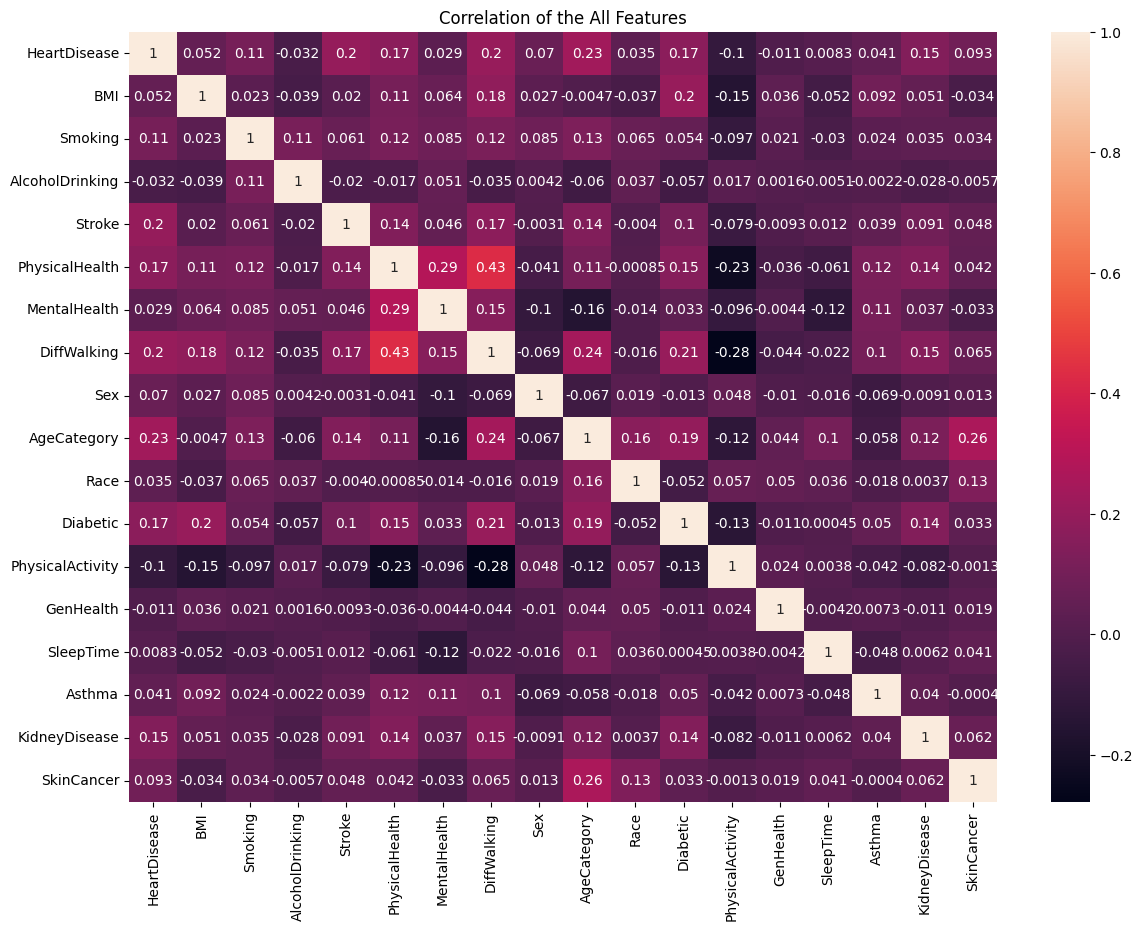

In [56]:
import seaborn as sn 

# using the seaborn module to visualize the percentage level of correlation between the attributes ....
plt.figure(figsize=(14, 10))
sn.heatmap(dt.corr(), annot=True)
plt.title('Correlation of the All Features')
plt.show()

Key Observation
<hr>
Deibetic Patient, kidney disease and Physical activity has the highest <br>
probability score of correlation with having Heart Disease data

<h3 style='color:purple; align:center' align='center'> DATA SCALLING USING MIN MAX SCALE APPROACH </h3>

In [57]:
from sklearn.preprocessing import MinMaxScaler

# scalling of data to reduce data distribution of certain columsn (BMI, PhysicalHealth)
# min max scaler approach is used ... 
min_max = MinMaxScaler()
dt[['BMI','PhysicalHealth','MentalHealth','SleepTime', 'GenHealth']] = \
            min_max.fit_transform(dt[['BMI','PhysicalHealth','MentalHealth','SleepTime', 'GenHealth']])
dt

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,7,5,2,1,1.00,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,12,5,0,1,1.00,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,9,5,2,1,0.25,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,11,5,0,0,0.50,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,4,5,0,1,1.00,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,1,8,3,2,0,0.25,0.217391,1,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,3,3,0,1,1.00,0.173913,1,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,5,3,0,1,0.50,0.217391,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,1,3,0,0,0.50,0.478261,0,0,0


## Heart Disease Data Splitting (80%-20%) 

In [58]:
# extracting the output variable (Y) and the input variable (X)
y = dt.HeartDisease
X = dt.drop(columns=['HeartDisease'])

In [59]:
# splitting the dataset into 80% training sample and 20% testing sample
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# show the splited data value count
print('Training Set 80%')
print('_________________________')
print(f'X train {len(X_train)}')
print(f'y Train {len(y_train)}\n')
print('=================================')
print('Testing Set 20%')
print('_________________________')
print(f'X Test {len(X_test)}')
print(f'y Test {len(y_test)}')

Training Set 80%
_________________________
X train 255836
y Train 255836

Testing Set 20%
_________________________
X Test 63959
y Test 63959


# Machine Learning Models

<h3 style='color:green; font-family:taoma' align='left'> the dataset contain two distinct class (Yes=1 and No = 0) hence, a binary classifiaction problem </h3>
<h3 style='color:red; font-family:taoma'>Machine Learning Algorithm </h3>


<ol style='color:blue'>
    <li> Logistic Regression </li>
    <li> Naive Bayes  </li>
    <li> Gradient Boost Classifier </li>
    <li> Decision Tree </li>
    <li> Random Forest </li>
    <li> KNN Classifer </li>
    <li> AdaBoost Classifer </li>
</ol>

## Logistic Regression

In [60]:
# training logistic regression Model... 
lr  = LogisticRegression()
lr_model = lr.fit(X_train , y_train)
accuracy = lr_model.score(X_test, y_test)
print('====================================================================================================')
print(f'            {str(lr_model)[:-2]} Machine Learning Algorithm : Accuracy -> {accuracy}')
print('====================================================================================================')

KeyboardInterrupt: 

======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58418
           1       0.50      0.09      0.15      5541

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959



======================================= CONFUSION MATRIX =======================================


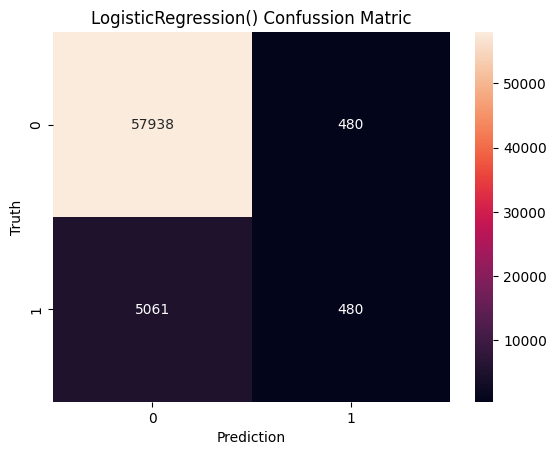

In [ ]:
# Evaluating the logistic regression model 
prediction = lr_model.predict(X_test)
rpt = metrics.classification_report(y_test, prediction)
cm = metrics.confusion_matrix(y_test, prediction)

print('======================================= CLASSIFICATION REPORT ==================================')
print(rpt)

print('\n\n======================================= CONFUSION MATRIX =======================================')
plt.title(f'{str(lr_model)} Confussion Matric')
sn.heatmap(cm, annot=True, fmt='d' )
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

Text(0, 0.5, 'True Positive Rate (TPR)')

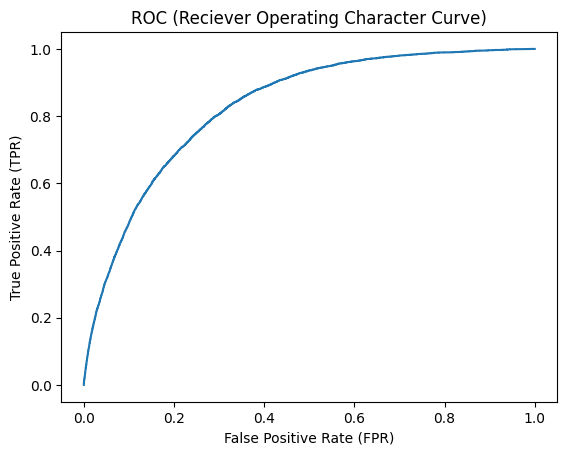

In [ ]:
# visualizing the ROC curve metric
prob_pred = lr_model.predict_proba(X_test)[::, 1]
fpr , tpr, th = metrics.roc_curve(y_test, prob_pred)

plt.title('ROC (Reciever Operating Character Curve)')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

## Generic Function for Model training and evaluation

In [ ]:
# building a generalize/custom method for training the  machine learning models
# evaluating and visualizing scores,  showing classification report, confusion matrix and ROC curve 
# this will avoid repition of codes

y = dt.HeartDisease
X = dt.drop(columns=['HeartDisease'])

def compile_ml_model(model, X, y, labels, cr=True, confmatix=True, roc=True): 
    
#     DATA SPLITING 
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

    print('Training Set 80%')
    print('_________________________')
    print(f'X train {len(X_train)}')
    print(f'y Train {len(y_train)}\n')
    print('=================================')
    print('Testing Set 20%')
    print('_________________________')
    print(f'X Test {len(X_test)}')
    print(f'y Test {len(y_test)}')
    
#     MODEL TRAINING
    ml_model  = model
    ml_model = ml_model.fit(X_train , y_train)
    accuracy = ml_model.score(X_test, y_test)
    print('====================================================================================================')
    print(f'            {str(ml_model)[:-2]} Machine Learning Algorithm : Accuracy -> {accuracy}')
    print('====================================================================================================')
    
#     MODEL EVALUTAION 
    prediction = ml_model.predict(X_test)
    rpt = metrics.classification_report(y_test, prediction)
    cm = metrics.confusion_matrix(y_test, prediction)
    
#     CHECKING CLASSIFICATION REPORT CONDITION
    if cr: 
        print('======================================= CLASSIFICATION REPORT ==================================')
        print(rpt)

 #     CHECKING CONFUSION MATRIX REPORT CONDITION
    if confmatix:
        print('\n\n======================================= CONFUSION MATRIX =======================================')
        plt.title(f'{str(ml_model)} Confussion Matric')
        sn.heatmap(cm, annot=True, fmt='d' , xticklabels=labels, yticklabels=labels)
        plt.xlabel('Prediction')
        plt.ylabel('Truth')
        plt.show()
        
#     CHECKING ROC REPORT CONDITION
    if roc:
        print('\n\n======================================= ROC CURVE ============================================')
        prob_pred = ml_model.predict_proba(X_test)[::, 1]
        fpr , tpr, th = metrics.roc_curve(y_test, prob_pred)

        plt.title('ROC (Reciever Operating Character Curve)')
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')

## Gussian Naive Bayes Algorithm

Training Set 80%
_________________________
X train 255836
y Train 255836

Testing Set 20%
_________________________
X Test 63959
y Test 63959
            GaussianNB Machine Learning Algorithm : Accuracy -> 0.8458700104754608
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     58519
           1       0.26      0.45      0.33      5440

    accuracy                           0.85     63959
   macro avg       0.60      0.67      0.62     63959
weighted avg       0.89      0.85      0.86     63959



======================================= CONFUSION MATRIX =======================================


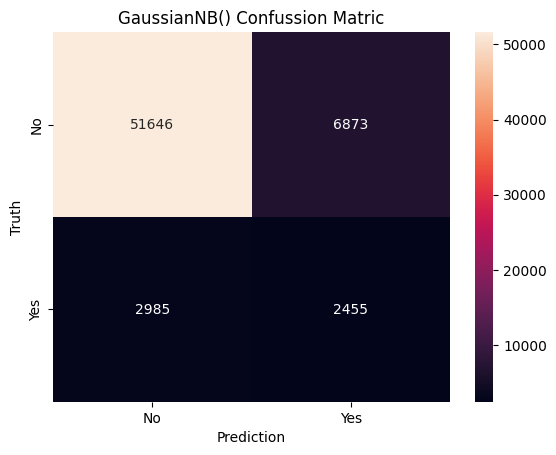



======================================= ROC CURVE ============================================


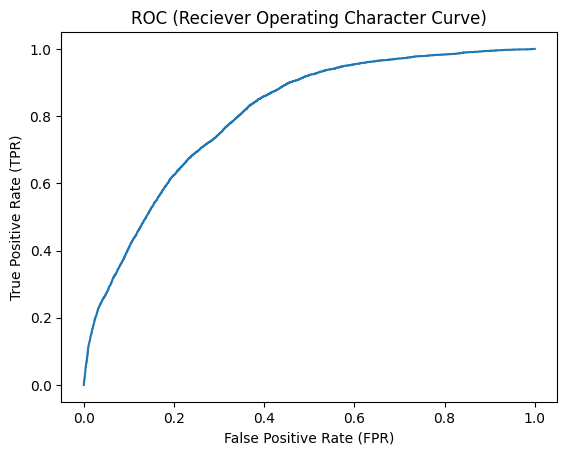

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE GUSSIAN NAIVE BAYES 
compile_ml_model(GaussianNB(), X, y,  ['No', "Yes"] )

In [ ]:
# SIZE = 50000
# compile_ml_model(SVC(), X_train[:SIZE], y_train[:SIZE], X_test[:SIZE], y_test[:SIZE], ['No', "Yes"] )

## GradientBoostingClassifier Model

Training Set 80%
_________________________
X train 255836
y Train 255836

Testing Set 20%
_________________________
X Test 63959
y Test 63959
            GradientBoostingClassifier Machine Learning Algorithm : Accuracy -> 0.9136790756578433
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58388
           1       0.53      0.09      0.15      5571

    accuracy                           0.91     63959
   macro avg       0.72      0.54      0.55     63959
weighted avg       0.89      0.91      0.88     63959



======================================= CONFUSION MATRIX =======================================


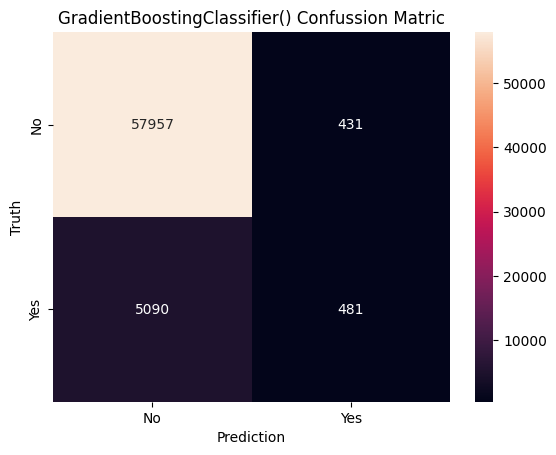



======================================= ROC CURVE ============================================


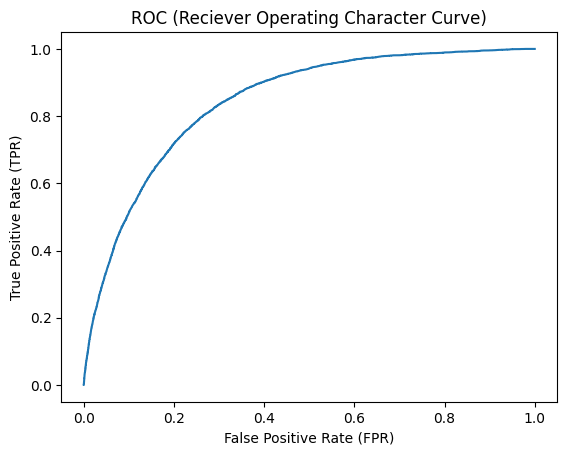

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE GRADIENT BOOST CLASSIFIER 
compile_ml_model(GradientBoostingClassifier(), X,y,  ['No', "Yes"] )

## DecisionTree Classifier Model

Training Set 80%
_________________________
X train 255836
y Train 255836

Testing Set 20%
_________________________
X Test 63959
y Test 63959
            DecisionTreeClassifier Machine Learning Algorithm : Accuracy -> 0.8644600447161462
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     58537
           1       0.23      0.26      0.25      5422

    accuracy                           0.86     63959
   macro avg       0.58      0.59      0.59     63959
weighted avg       0.87      0.86      0.87     63959



======================================= CONFUSION MATRIX =======================================


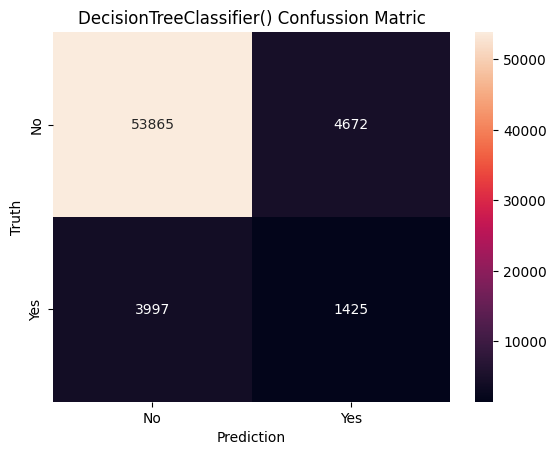



======================================= ROC CURVE ============================================


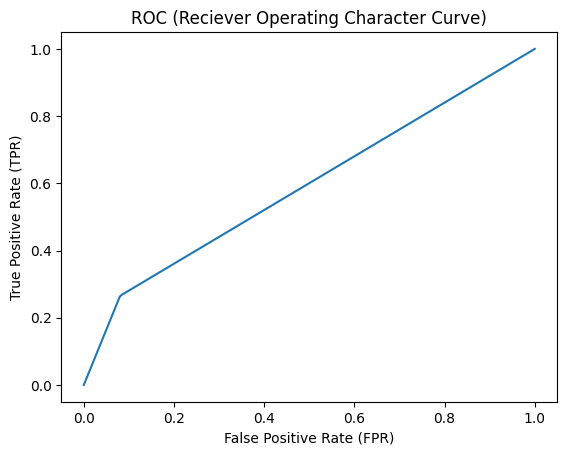

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE DECISION TREE CLASSIFIER
compile_ml_model(DecisionTreeClassifier(), X, y , ['No', "Yes"] )

### Random Forest Classifier Model 

Training Set 80%
_________________________
X train 255836
y Train 255836

Testing Set 20%
_________________________
X Test 63959
y Test 63959
            RandomForestClassifier Machine Learning Algorithm : Accuracy -> 0.9072530840069419
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58522
           1       0.36      0.12      0.18      5437

    accuracy                           0.91     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.88      0.91      0.89     63959



======================================= CONFUSION MATRIX =======================================


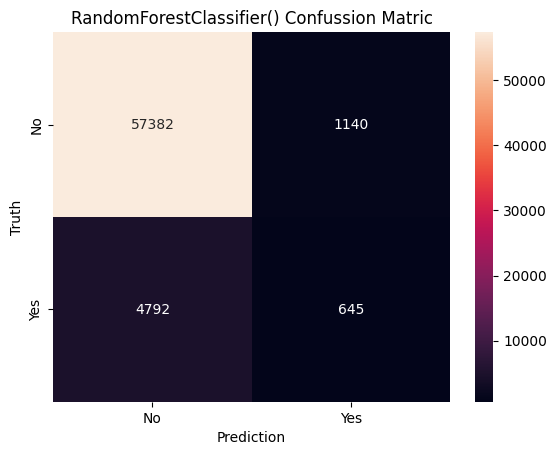



======================================= ROC CURVE ============================================


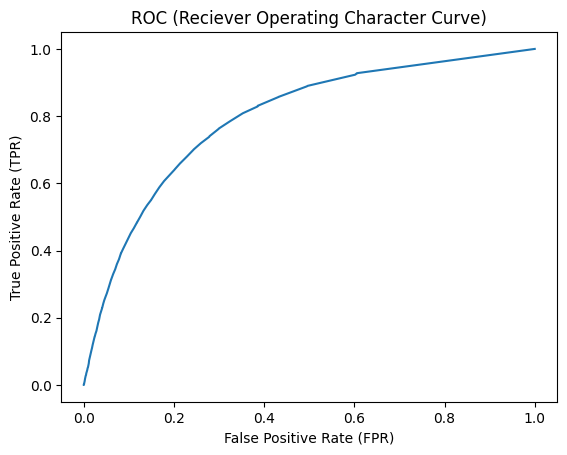

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE RANDOM FOREST CLASSIFIER
compile_ml_model(RandomForestClassifier(), X, y, ['No', "Yes"] )

## KNeighborsClassifier Model

Training Set 80%
_________________________
X train 255836
y Train 255836

Testing Set 20%
_________________________
X Test 63959
y Test 63959
            KNeighborsClassifier Machine Learning Algorithm : Accuracy -> 0.9070810988289373
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58474
           1       0.38      0.13      0.20      5485

    accuracy                           0.91     63959
   macro avg       0.65      0.56      0.57     63959
weighted avg       0.88      0.91      0.89     63959



======================================= ROC CURVE ============================================


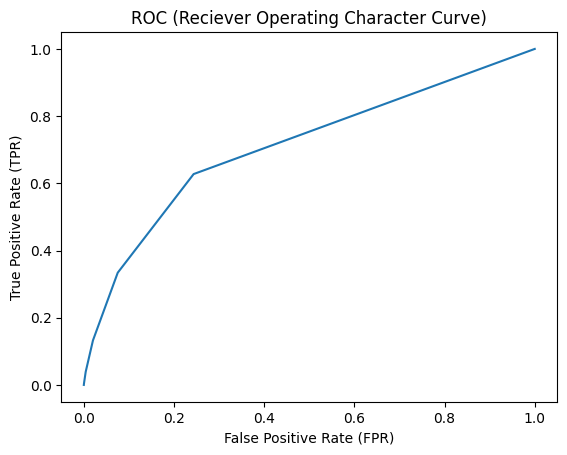

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE KNN CLASSIFIER
compile_ml_model(KNeighborsClassifier(), X, y,  ['No', "Yes"], confmatix=False)

### Ada Boost Classifier 

Training Set 80%
_________________________
X train 255836
y Train 255836

Testing Set 20%
_________________________
X Test 63959
y Test 63959
            AdaBoostClassifier Machine Learning Algorithm : Accuracy -> 0.9159148829719038
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58489
           1       0.54      0.11      0.19      5470

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959



======================================= CONFUSION MATRIX =======================================


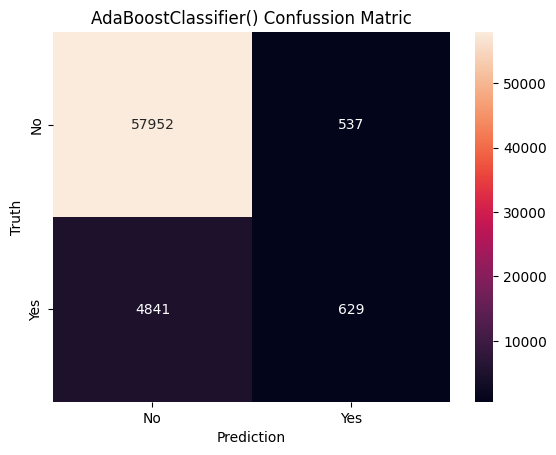



======================================= ROC CURVE ============================================


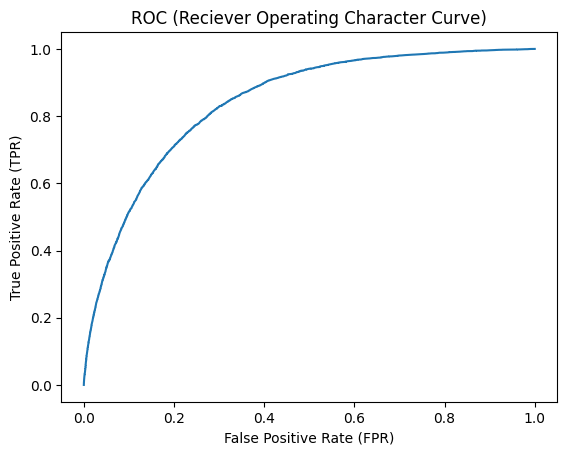

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE ADABOOST CLASSIFIER
compile_ml_model(AdaBoostClassifier(), X, y, ['No', "Yes"] )

### Enhancing Dataset  (Using Over Sample Balancing Techniques and Data Scalling)

# DATA BALANCING

## Data Balancing using SMOTE Techniques

<h2 style='color:green'>What is SMOTE?</h2>
<ol>
<li>
SMOTE stands for Synthetic Minority Over-sampling TEchnique.</li>
<li>It is an over-sampling technique in which new synthetic observations are created using the existing samples of the minority class.</li>
<li>It generates virtual training records by linear interpolation for the minority class.</li>
<li>These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbours for each example in the minority class.</li>
<li>After the oversampling process, the data is reconstructed, and several classification models can be applied for the processed data.</li>
</ol

In [ ]:
from imblearn.over_sampling import SMOTE

# DUE TO THE IMBALANCE NATURE OF THE DATASET AVAILAIBLE ITS ESSENTIAL TO BALANCE THE DATASET TO AVOID BIAS PREDICTION 
# BY THE MACHINE LEARNING ALGORITHM. THE MINORITY CLASS IS EXPERIENCING LOW ACCURACY .. LET LEVERAGE THE DATASET TO IMPROVE THIER ACCURACY
# initializing the SMOTE object ... and then 'fit_resample to generate synthetic datapoint
smote = SMOTE(sampling_strategy='minority')
x_balanced , y_balanced = smote.fit_resample(X, y)

# checking if the SMOTE sample balance the data...  
y_balanced.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

## Visualizing Balance Data

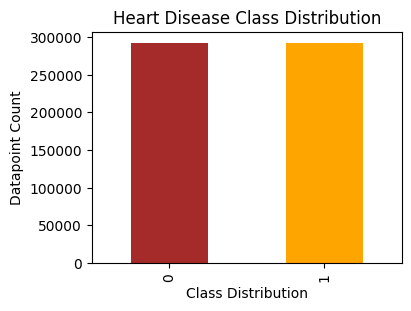

In [ ]:
# visualizing the balanced data
y_balanced.value_counts().plot(kind='bar', title= f'Heart Disease Class Distribution', color=['brown', 'orange'], figsize=(4,3))
plt.xlabel('Class Distribution')
plt.ylabel('Datapoint Count')
plt.grid(False)
plt.show()

<h3 style='color:red; font-family:taoma'> Machine Learning Algorithm  <b> + </b> Data balancing (SMOTE) </h3>


<ol style='color:blue'>
    <li> Logistic Regression </li>
    <li> Gradient Boost Classifier </li>
    <li> Decision Tree </li>
    <li> Naive Bayes  </li>
    <li> Random Forest </li>
    <li> AdaBoost Classifer </li>
    <li> KNN Classifer </li>
    
</ol>

## Logistic Regression Model

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE LOGISTIC REGRESSION CLASSIFIER - USING BALANCED DATA
compile_ml_model(LogisticRegression(), x_balanced, y_balanced,  ['No', "Yes"] )

## GradientBoostingClassifier Model

Training Set 80%
_________________________
X train 467875
y Train 467875

Testing Set 20%
_________________________
X Test 116969
y Test 116969
            GradientBoostingClassifier Machine Learning Algorithm : Accuracy -> 0.867298173020202
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     58749
           1       0.88      0.85      0.86     58220

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969



======================================= CONFUSION MATRIX =======================================


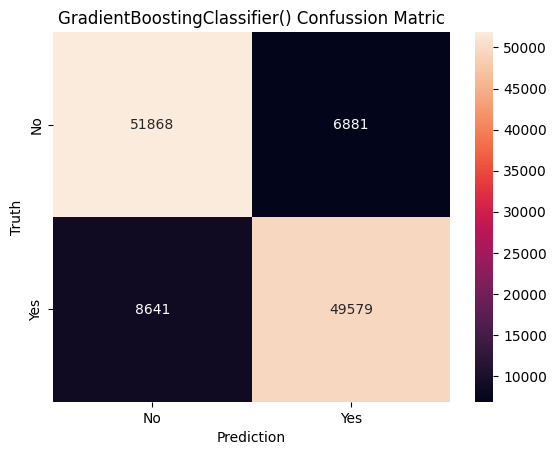



======================================= ROC CURVE ============================================


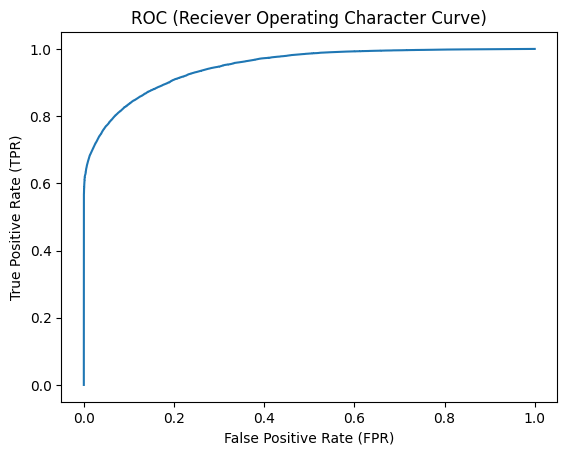

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE GRADIENT BOOST CLASSIFIER - USING BALANCED DATA
compile_ml_model(GradientBoostingClassifier(), x_balanced, y_balanced,  ['No', "Yes"] )

## DecisionTree Classifier Model

Training Set 80%
_________________________
X train 467875
y Train 467875

Testing Set 20%
_________________________
X Test 116969
y Test 116969
            DecisionTreeClassifier Machine Learning Algorithm : Accuracy -> 0.8939377099915362
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     58367
           1       0.89      0.90      0.89     58602

    accuracy                           0.89    116969
   macro avg       0.89      0.89      0.89    116969
weighted avg       0.89      0.89      0.89    116969



======================================= CONFUSION MATRIX =======================================


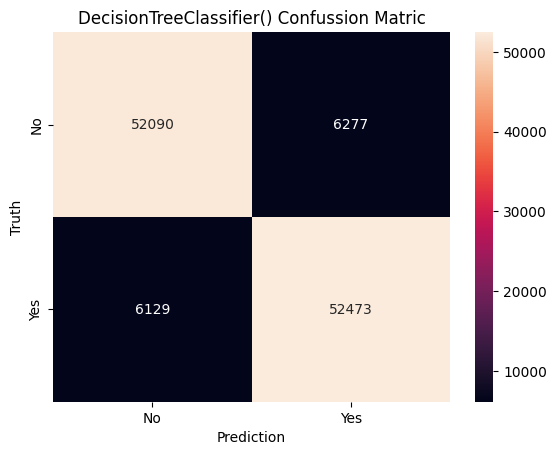



======================================= ROC CURVE ============================================


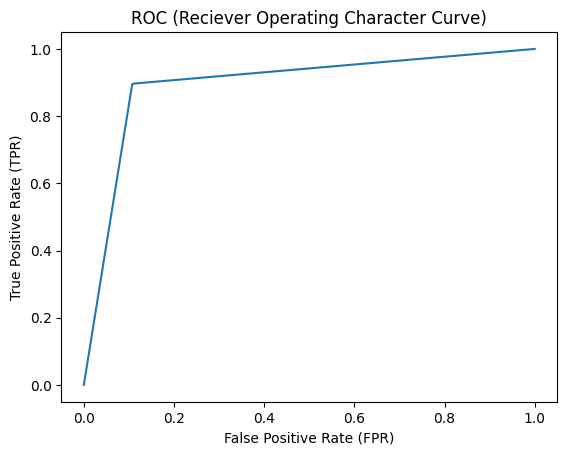

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE DECISION TREE CLASSIFIER - USING BALANCED DATA
compile_ml_model(DecisionTreeClassifier(), x_balanced, y_balanced, ['No', "Yes"] )

## Naive Bayesian Classifier

Training Set 80%
_________________________
X train 467875
y Train 467875

Testing Set 20%
_________________________
X Test 116969
y Test 116969
            GaussianNB Machine Learning Algorithm : Accuracy -> 0.7046909865006967
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.67      0.79      0.73     58675
           1       0.75      0.61      0.67     58294

    accuracy                           0.70    116969
   macro avg       0.71      0.70      0.70    116969
weighted avg       0.71      0.70      0.70    116969



======================================= CONFUSION MATRIX =======================================


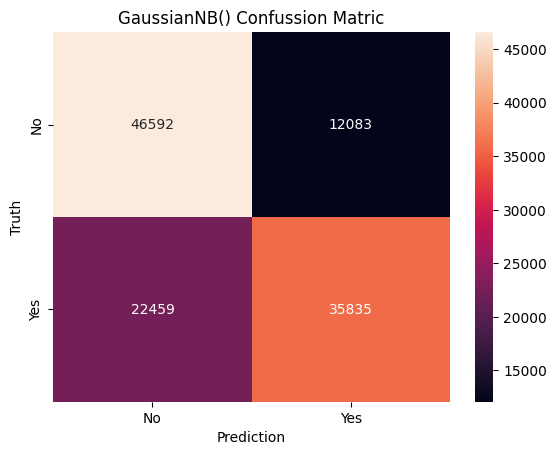

In [40]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE NAIVE BAYESIAN CLASSIFIER - USING BALANCED DATA
compile_ml_model(GaussianNB(), x_balanced, y_balanced, ['No', "Yes"], confmatix=True, roc=False  )

### LogisticRegression Model

Training Set 80%
_________________________
X train 467875
y Train 467875

Testing Set 20%
_________________________
X Test 116969
y Test 116969
            LogisticRegression Machine Learning Algorithm : Accuracy -> 0.7435132385503851
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.75      0.72      0.74     58606
           1       0.73      0.76      0.75     58363

    accuracy                           0.74    116969
   macro avg       0.74      0.74      0.74    116969
weighted avg       0.74      0.74      0.74    116969



======================================= CONFUSION MATRIX =======================================


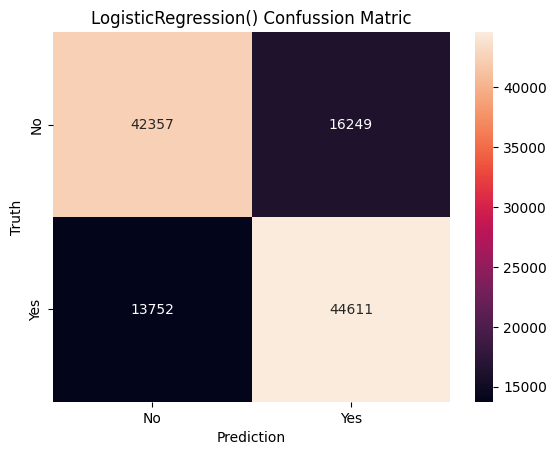



======================================= ROC CURVE ============================================


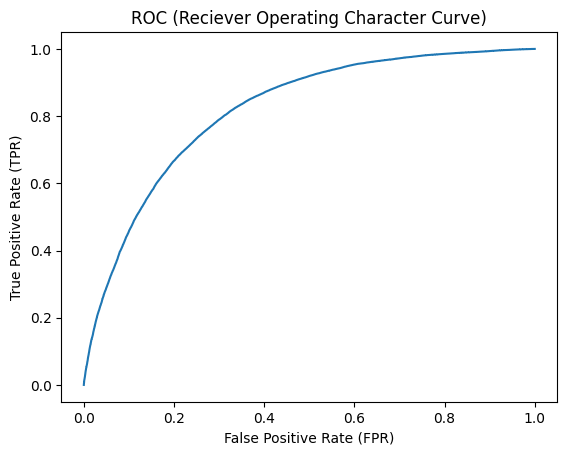

In [41]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE LOGISTIC REGRESSION MODEL - USING BALANCED DATA
compile_ml_model(LogisticRegression(), x_balanced, y_balanced, ['No', "Yes"], confmatix=True )

## Random forest Classifier

Training Set 80%
_________________________
X train 467875
y Train 467875

Testing Set 20%
_________________________
X Test 116969
y Test 116969
            RandomForestClassifier Machine Learning Algorithm : Accuracy -> 0.9230736348947157
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     58287
           1       0.93      0.92      0.92     58682

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969



======================================= CONFUSION MATRIX =======================================


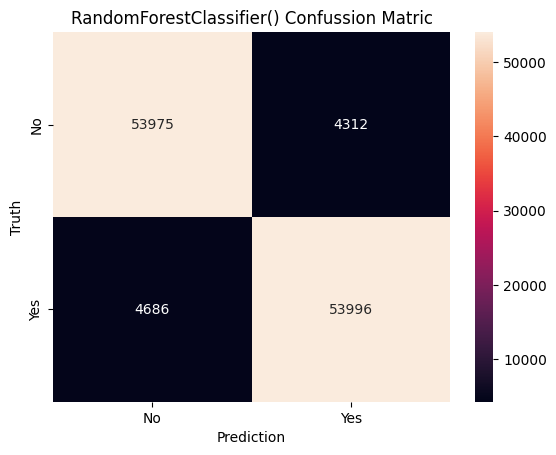



======================================= ROC CURVE ============================================


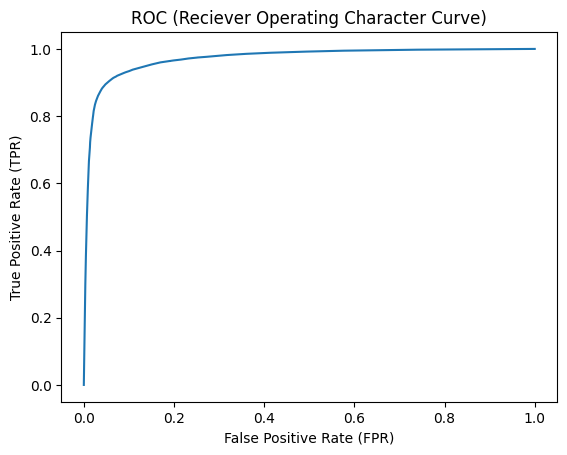

In [42]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE RANDOM FOREST CLASSIFIER - USING BALANCED DATA
compile_ml_model(RandomForestClassifier(), x_balanced, y_balanced , ['No', "Yes"], confmatix=True)

## Ada BoosT Classifier Model 

Training Set 80%
_________________________
X train 467875
y Train 467875

Testing Set 20%
_________________________
X Test 116969
y Test 116969
            AdaBoostClassifier Machine Learning Algorithm : Accuracy -> 0.8309637596286196
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     58273
           1       0.83      0.83      0.83     58696

    accuracy                           0.83    116969
   macro avg       0.83      0.83      0.83    116969
weighted avg       0.83      0.83      0.83    116969



======================================= CONFUSION MATRIX =======================================


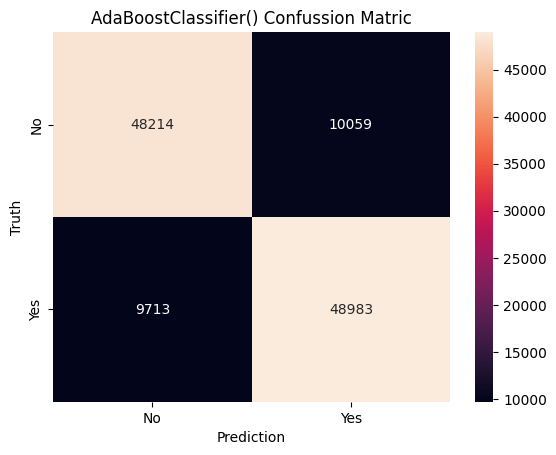



======================================= ROC CURVE ============================================


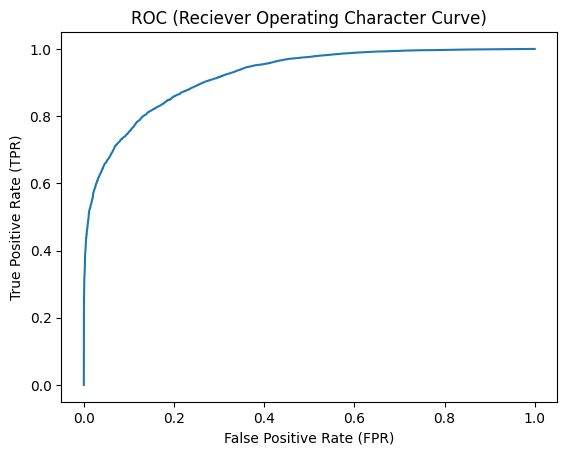

In [43]:
# AdaBoostClassifier
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE ADA-BOOST CLASSIFIER - USING BALANCED DATA
compile_ml_model(AdaBoostClassifier(), x_balanced, y_balanced, ['No', "Yes"], confmatix=True)

## KNeighborsClassifier Model

Training Set 80%
_________________________
X train 467875
y Train 467875

Testing Set 20%
_________________________
X Test 116969
y Test 116969
            KNeighborsClassifier Machine Learning Algorithm : Accuracy -> 0.8520804657644333
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     58335
           1       0.81      0.92      0.86     58634

    accuracy                           0.85    116969
   macro avg       0.86      0.85      0.85    116969
weighted avg       0.86      0.85      0.85    116969



======================================= CONFUSION MATRIX =======================================


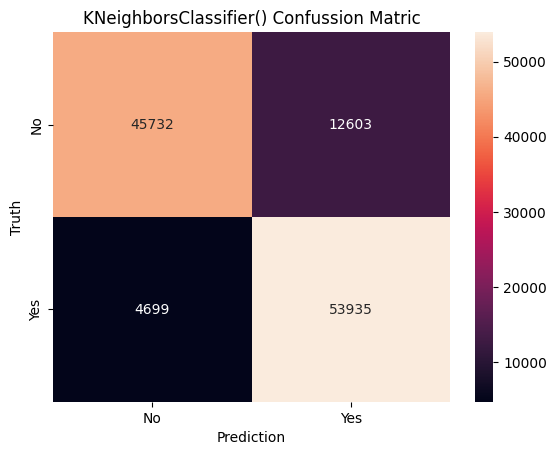



======================================= ROC CURVE ============================================


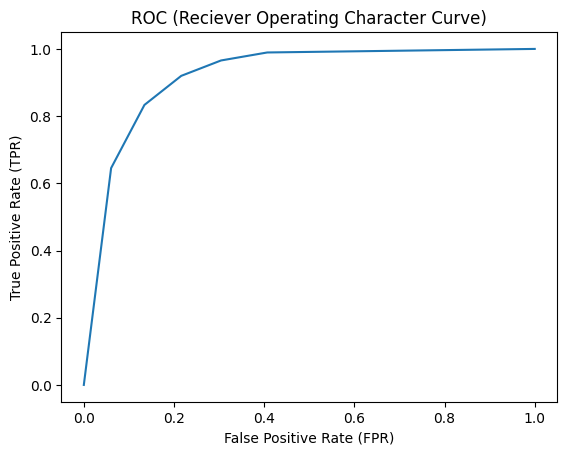

In [44]:
from sklearn.neighbors import KNeighborsClassifier
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE KNN CLASSIFIER - USING BALANCED DATA
compile_ml_model(KNeighborsClassifier(),x_balanced , y_balanced , ['No', "Yes"], confmatix=True)

## Adaptive Synthetic Sampling (ADASYN)

In [45]:
# ADASYN is a more generic framework, for each of the minority observations it first finds the impurity of the 
# neighborhood, by taking the ratio of majority 
# observations in the neighborhood and k.

In [46]:
from imblearn.over_sampling import ADASYN
y = dt['HeartDisease']
X = dt.drop(columns='HeartDisease')

# balancing the Heart Dieases Dataset using ADAYSN techniques
adsyn_sampler = ADASYN()
X_resample, y_resample = adsyn_sampler.fit_resample(X,y)

y_resample.value_counts()

1    299370
0    292422
Name: HeartDisease, dtype: int64

<h3 style='color:red; font-family:taoma'> Machine Learning Algorithm  <b> + </b> Data balancing (ADASYN) </h3>


<ol style='color:blue'>
 <li> Gradient Boost Classifier </li>
 <li> AdaBoost Classifer </li>
    <li> Logistic Regression </li>
     <li> Naive Bayes  </li>
     <li> Random Forest </li>
    <li> Decision Tree </li>
    <li> KNN Classifer </li>
    
</ol>

## Gradient Boost Classifier

Training Set 80%
_________________________
X train 473433
y Train 473433

Testing Set 20%
_________________________
X Test 118359
y Test 118359
            GradientBoostingClassifier Machine Learning Algorithm : Accuracy -> 0.8666007654677718
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     58468
           1       0.88      0.85      0.87     59891

    accuracy                           0.87    118359
   macro avg       0.87      0.87      0.87    118359
weighted avg       0.87      0.87      0.87    118359



======================================= CONFUSION MATRIX =======================================


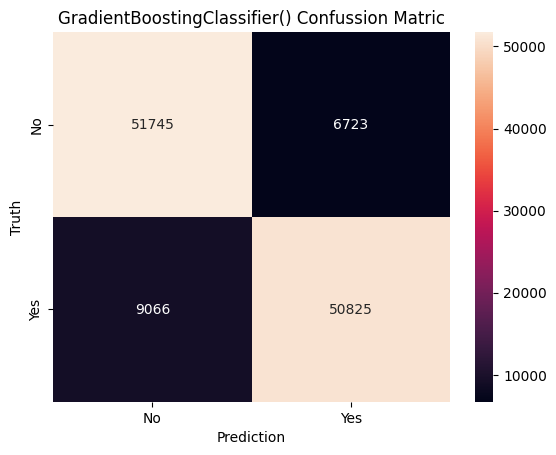



======================================= ROC CURVE ============================================


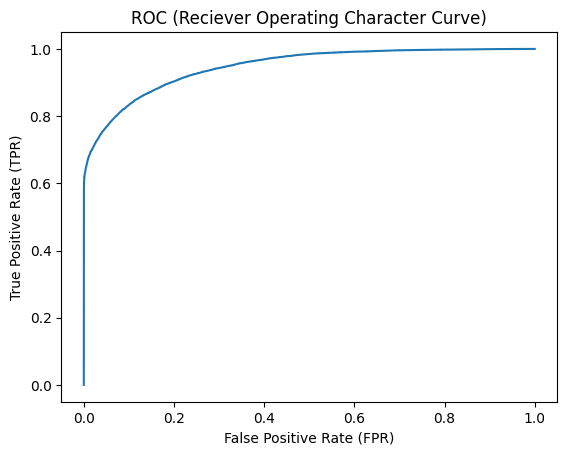

In [47]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE GRADIENT BOOST CLASSIFIER - USING BALANCED DATA
compile_ml_model(GradientBoostingClassifier(), X_resample, y_resample,  ['No', "Yes"] )

## Ada Boost Classifier

Training Set 80%
_________________________
X train 473433
y Train 473433

Testing Set 20%
_________________________
X Test 118359
y Test 118359
            AdaBoostClassifier Machine Learning Algorithm : Accuracy -> 0.8249731748325011
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     58566
           1       0.83      0.83      0.83     59793

    accuracy                           0.82    118359
   macro avg       0.82      0.82      0.82    118359
weighted avg       0.82      0.82      0.82    118359



======================================= ROC CURVE ============================================


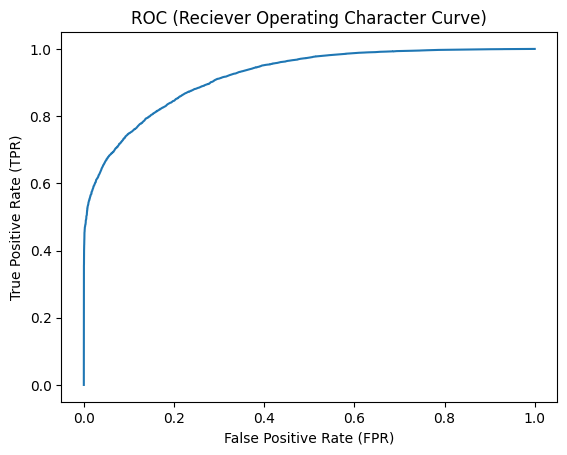

In [48]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE ADA-BOOST CLASSIFIER - USING BALANCED DATA
compile_ml_model(AdaBoostClassifier(), X_resample, y_resample, ['No', "Yes"], confmatix=False )

Training Set 80%
_________________________
X train 473433
y Train 473433

Testing Set 20%
_________________________
X Test 118359
y Test 118359
            DecisionTreeClassifier Machine Learning Algorithm : Accuracy -> 0.8898858557439654
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     58414
           1       0.89      0.89      0.89     59945

    accuracy                           0.89    118359
   macro avg       0.89      0.89      0.89    118359
weighted avg       0.89      0.89      0.89    118359



======================================= ROC CURVE ============================================


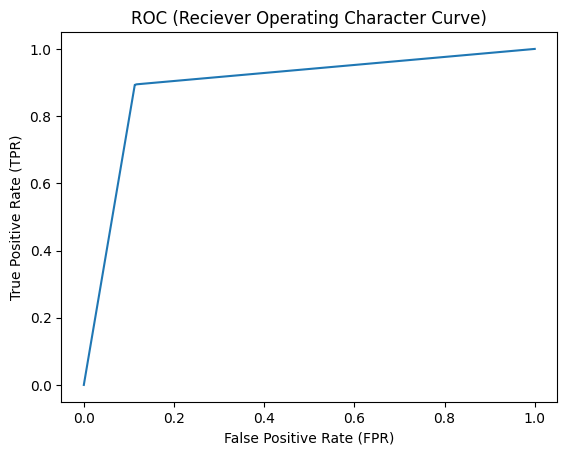

In [49]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE DECISION CLASSIFIER - USING BALANCED DATA
compile_ml_model(DecisionTreeClassifier(), X_resample, y_resample, ['No', "Yes"], confmatix=False )

## Logistic Regression Model

Training Set 80%
_________________________
X train 473433
y Train 473433

Testing Set 20%
_________________________
X Test 118359
y Test 118359
            LogisticRegression Machine Learning Algorithm : Accuracy -> 0.7273718094948419
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.74      0.69      0.71     58227
           1       0.72      0.76      0.74     60132

    accuracy                           0.73    118359
   macro avg       0.73      0.73      0.73    118359
weighted avg       0.73      0.73      0.73    118359



======================================= ROC CURVE ============================================


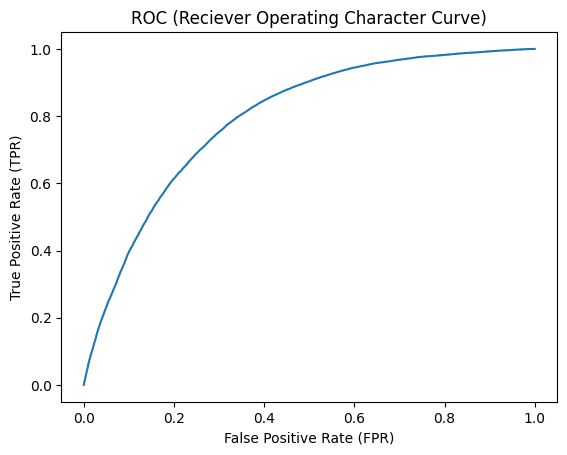

In [50]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING LOGISTIC REGRESSION CLASSIFIER - USING BALANCED DATA
compile_ml_model(LogisticRegression(),X_resample, y_resample, ['No', "Yes"], confmatix=False )

## Navie Bayes Algorithm

In [51]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE NAIVE BAYES - USING BALANCED DATA
compile_ml_model(MultinomialNB(), X_resample, y_resample, ['No', "Yes"], confmatix=False , roc=False)

Training Set 80%
_________________________
X train 473433
y Train 473433

Testing Set 20%
_________________________
X Test 118359
y Test 118359
            MultinomialNB Machine Learning Algorithm : Accuracy -> 0.6834376768982502
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.67      0.72      0.69     58724
           1       0.70      0.65      0.67     59635

    accuracy                           0.68    118359
   macro avg       0.68      0.68      0.68    118359
weighted avg       0.68      0.68      0.68    118359



## Random Forest Algorithm

In [53]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE RANDOM FOREST - USING BALANCED DATA
compile_ml_model(RandomForestClassifier(), X_resample, y_resample, ['No', "Yes"], confmatix=False , roc=False)

Training Set 80%
_________________________
X train 473433
y Train 473433

Testing Set 20%
_________________________
X Test 118359
y Test 118359
            RandomForestClassifier Machine Learning Algorithm : Accuracy -> 0.9224816025819752
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     58317
           1       0.93      0.92      0.92     60042

    accuracy                           0.92    118359
   macro avg       0.92      0.92      0.92    118359
weighted avg       0.92      0.92      0.92    118359



## Decision Tree Classifier

In [ ]:
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE Decision FOREST - USING BALANCED DATA
compile_ml_model(DecisionTreeClassifier(), X_resample, y_resample, ['No', "Yes"], confmatix=False , roc=False)

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE KNN CLASSIFIER - USING BALANCED DATA
compile_ml_model(KNeighborsClassifier(),X_resample, y_resample, ['No', "Yes"], confmatix=False , roc=False)